# Raccon Creek Project
## Group Member: Henry Anderson, Philipp Rajah Moura Srivastava, Jingqiao Tang

# 1. Introduction

BlahBlah

In [1]:
import pandas as pd
NOAA = pd.read_csv("PrecipData.csv", skiprows= 5)                             # Read dataframe
RC = pd.read_table('RaccoonCreekFlowData.txt', skiprows=31, na_filter=False)

In [2]:
NOAA = NOAA[["Date", "Precip (in)"]]                                         # Make a subset
RC = RC.rename(index = str, columns= {"datetime":'Date', "110246_00065" : "gH(ft)", "110247_00060": \
                                      "dC(ft/sec)",  '110248_00045':"pRcP(in/15m)", \
                                     "110246_00065_cd": 'gQ', '110247_00060_cd': 'dCQ', \
                                     '110248_00045_cd': 'pRcPQ'})            # Rename the dataset
RC = RC.iloc[:, [2, 4,5, 6, 7, 8, 9]]                                        # Make a subset

In [3]:
def removeTime(date):
    """
    A function which will remove the spcific time in date format.
    
    Inputs:
    date: date formatted in YEAR-MM-DD HH:MM
    
    Return value:
    YEAR-MM-DD
    """
    return date[:10]                                           # Return the first ten item in a string
RC['Date'] = RC['Date'].apply(lambda x: removeTime(x))         # Remove all the time in RC dataset

In [5]:
RC['dC(ft/sec)'] = pd.to_numeric(RC['dC(ft/sec)'], downcast='float')          # Change the discharge value into float
RC['gH(ft)'] = pd.to_numeric(RC['gH(ft)'], downcast='float')                  # Change the gage height value into float
RC_reduced = RC.groupby(by = 'Date' ).agg('mean')                             # Make a new dataset which has the average discharge and gage height for each day
RC_reduced = RC_reduced.reset_index()                                         # Reset the index

In [7]:
def convertDate(date):
    """
    A function which change the date format from YEAR-MM-DD to MM/DD/YY
    
    Inputs:
    date: date formatted in YEAR-MM-DD
    
    Return value:
    MM/DD/YY
    """
    return str(int(date[5:7])) + '/' + str(int(date[8:10])) + '/' + date[2:4]   # Return date in MM/DD/YY format

RC_reduced['Date'] = RC_reduced['Date'].apply(lambda x: convertDate(x))         # Change the date format

In [9]:
RC_NOAA_merge = pd.merge(RC_reduced, NOAA, on = 'Date' )          # Merge two dataset

        Date    gH(ft)  dC(ft/sec)  Precip (in)
0     8/1/17       NaN   16.240625         0.00
1     8/2/17       NaN   15.691667         0.00
2     8/3/17       NaN   20.226042         0.06
3     8/4/17       NaN   18.687500         0.04
4     8/5/17       NaN   15.893750         0.01
5     8/6/17       NaN   13.691667         0.00
6     8/7/17       NaN   13.890625         0.07
7     8/8/17       NaN   13.736459         0.18
8     8/9/17       NaN   12.431250         0.00
9    8/10/17       NaN   11.722917         0.00
10   8/11/17       NaN   11.660417         0.09
11   8/12/17       NaN   11.644792         0.20
12   8/13/17       NaN   10.806250         0.00
13   8/14/17       NaN   10.352500         0.00
14   8/15/17       NaN    9.683978         0.00
15   8/16/17       NaN    9.332604         0.01
16   8/17/17       NaN   10.487741         0.00
17   8/18/17       NaN   11.905209         0.45
18   8/19/17       NaN   11.210417         0.01
19   8/20/17       NaN   13.547916      

In [10]:
RC_NOAA_merge['Season'] = 0                               # Add a new column called Season, and set all value in that column as 0.
for idx, row in RC_NOAA_merge.iterrows():
    a = RC_NOAA_merge.loc[idx, 'Date'].split('/')        # Split date into Month, Day, and Year
    if a[0] == '3' or a[0] == '4' or a[0] == '5':        # If the date was in March, April, or May
        RC_NOAA_merge.loc[idx, 'Season'] = 'Spring'      # Assign it as Spring
    elif a[0] == '6' or a[0] == '7' or a[0] == '8':     # If the date was in June, July, or August
        RC_NOAA_merge.loc[idx, 'Season'] = 'Summer'     # Assign it as Summer
    elif a[0] == '9' or a[0] == '10' or a[0] == '11':   # If the date was in September, October, or November
        RC_NOAA_merge.loc[idx, 'Season'] = 'Fall'       # Assign it as Fall
    else:                                               # If the date was in December, January, or Febuary
        RC_NOAA_merge.loc[idx, 'Season'] = 'Winter'     # Assign it as Winter

        Date    gH(ft)  dC(ft/sec)  Precip (in)  Season
0     8/1/17       NaN   16.240625         0.00  Summer
1     8/2/17       NaN   15.691667         0.00  Summer
2     8/3/17       NaN   20.226042         0.06  Summer
3     8/4/17       NaN   18.687500         0.04  Summer
4     8/5/17       NaN   15.893750         0.01  Summer
5     8/6/17       NaN   13.691667         0.00  Summer
6     8/7/17       NaN   13.890625         0.07  Summer
7     8/8/17       NaN   13.736459         0.18  Summer
8     8/9/17       NaN   12.431250         0.00  Summer
9    8/10/17       NaN   11.722917         0.00  Summer
10   8/11/17       NaN   11.660417         0.09  Summer
11   8/12/17       NaN   11.644792         0.20  Summer
12   8/13/17       NaN   10.806250         0.00  Summer
13   8/14/17       NaN   10.352500         0.00  Summer
14   8/15/17       NaN    9.683978         0.00  Summer
15   8/16/17       NaN    9.332604         0.01  Summer
16   8/17/17       NaN   10.487741         0.00 

In [11]:
dataScores18 = RC_NOAA_merge                        # Make a copy of the dataset
for idx, row in dataScores18.iterrows():
    if dataScores18.loc[idx, 'Date'][-2:] == '17': # If it was 2017
        dataScores18 = dataScores18.drop([idx])    # Drop the row

        Date    gH(ft)  dC(ft/sec)  Precip (in)  Season
153   1/1/18       NaN   26.896875         0.01  Winter
154   1/2/18       NaN   24.590626         0.00  Winter
155   1/3/18       NaN   22.806250         0.00  Winter
156   1/4/18       NaN   24.923958         0.01  Winter
157   1/5/18       NaN   23.076042         0.02  Winter
158   1/6/18       NaN   20.472918         0.00  Winter
159   1/7/18       NaN   18.850000         0.00  Winter
160   1/8/18       NaN   20.863543          NaN  Winter
161   1/9/18       NaN   23.093750          NaN  Winter
162  1/10/18       NaN   24.626041          NaN  Winter
163  1/11/18       NaN  185.414581          NaN  Winter
164  1/12/18       NaN  895.041687          NaN  Winter
165  1/13/18       NaN  416.375000         1.09  Winter
166  1/14/18       NaN  171.187500         0.00  Winter
167  1/15/18       NaN  131.958328         0.04  Winter
168  1/16/18       NaN  101.223808         0.28  Winter
169  1/17/18       NaN   70.133331         0.01 

In [12]:
dataScores17 = RC_NOAA_merge                       # Make a copy of the dataset
for idx, row in dataScores17.iterrows():
    if dataScores17.loc[idx, 'Date'][-2:] == '18': # If it was in 2018
        dataScores17 = dataScores17.drop([idx])    # Drop the row

         Date  gH(ft)  dC(ft/sec)  Precip (in)  Season
0      8/1/17     NaN   16.240625         0.00  Summer
1      8/2/17     NaN   15.691667         0.00  Summer
2      8/3/17     NaN   20.226042         0.06  Summer
3      8/4/17     NaN   18.687500         0.04  Summer
4      8/5/17     NaN   15.893750         0.01  Summer
5      8/6/17     NaN   13.691667         0.00  Summer
6      8/7/17     NaN   13.890625         0.07  Summer
7      8/8/17     NaN   13.736459         0.18  Summer
8      8/9/17     NaN   12.431250         0.00  Summer
9     8/10/17     NaN   11.722917         0.00  Summer
10    8/11/17     NaN   11.660417         0.09  Summer
11    8/12/17     NaN   11.644792         0.20  Summer
12    8/13/17     NaN   10.806250         0.00  Summer
13    8/14/17     NaN   10.352500         0.00  Summer
14    8/15/17     NaN    9.683978         0.00  Summer
15    8/16/17     NaN    9.332604         0.01  Summer
16    8/17/17     NaN   10.487741         0.00  Summer
17    8/18

# 3. Visualization

In [13]:
import matplotlib.pyplot as plt
RC_NOAA_Spring = RC_NOAA_merge[RC_NOAA_merge.Season == 'Spring']   # Subset all the data in Spring
RC_NOAA_Summer = RC_NOAA_merge[RC_NOAA_merge.Season == 'Summer']   # Subset all the data in Summer
RC_NOAA_Fall = RC_NOAA_merge[RC_NOAA_merge.Season == 'Fall']       # Subset all the data in Fall
RC_NOAA_Winter = RC_NOAA_merge[RC_NOAA_merge.Season == 'Winter']   # Subset all the data in Winter

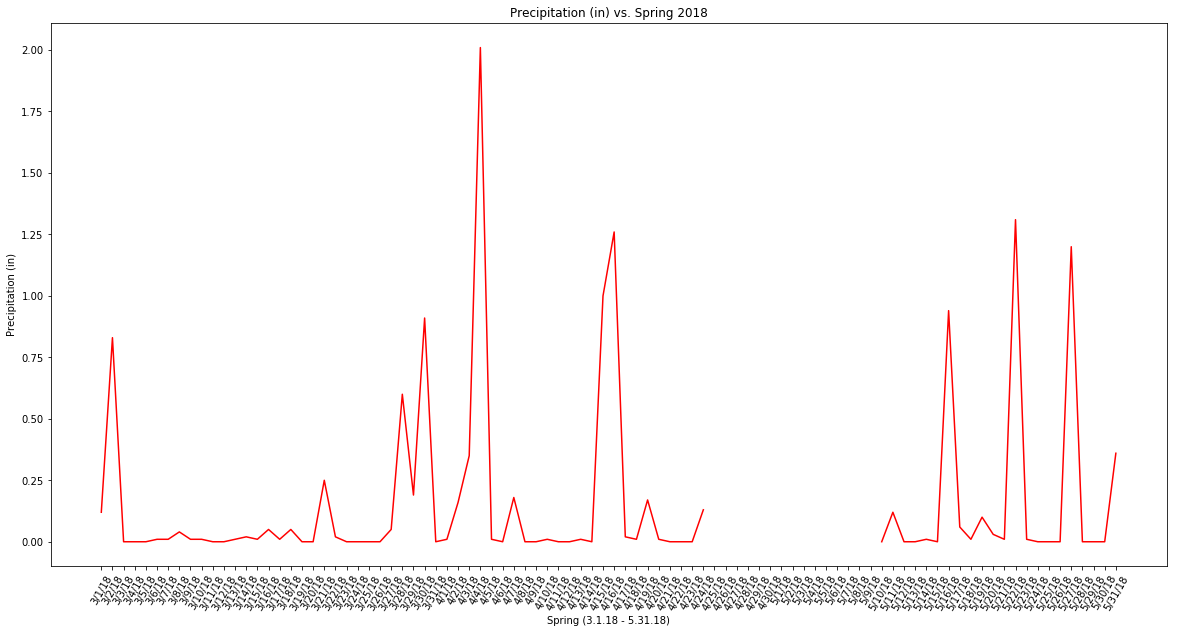

In [14]:
# Precipitation in Spring
Time = list(RC_NOAA_Spring['Date'])
Precip = list(RC_NOAA_Spring['Precip (in)'])
plt.figure(figsize = (20, 10))
plt.plot(Time, Precip, color = 'red')
plt.xlabel('Spring (3.1.18 - 5.31.18)')
plt.ylabel('Precipitation (in)')
plt.title('Precipitation (in) vs. Spring 2018')
axis = plt.xticks(RC_NOAA_Spring['Date'], RC_NOAA_Spring['Date'], rotation = 60)
plt.show()

##### This line plot shows the amount of precipitation in inches from March 3rd to May 31st 2018 (Spring). According to the line plot above, it appears that it rains a lot between March 24th to April 22nd and from May 15th to May 30th. Unfortunately, we do not have data from April 24th to May 9th. Precipitation reached its around April 3rd at 2 inches of rain.

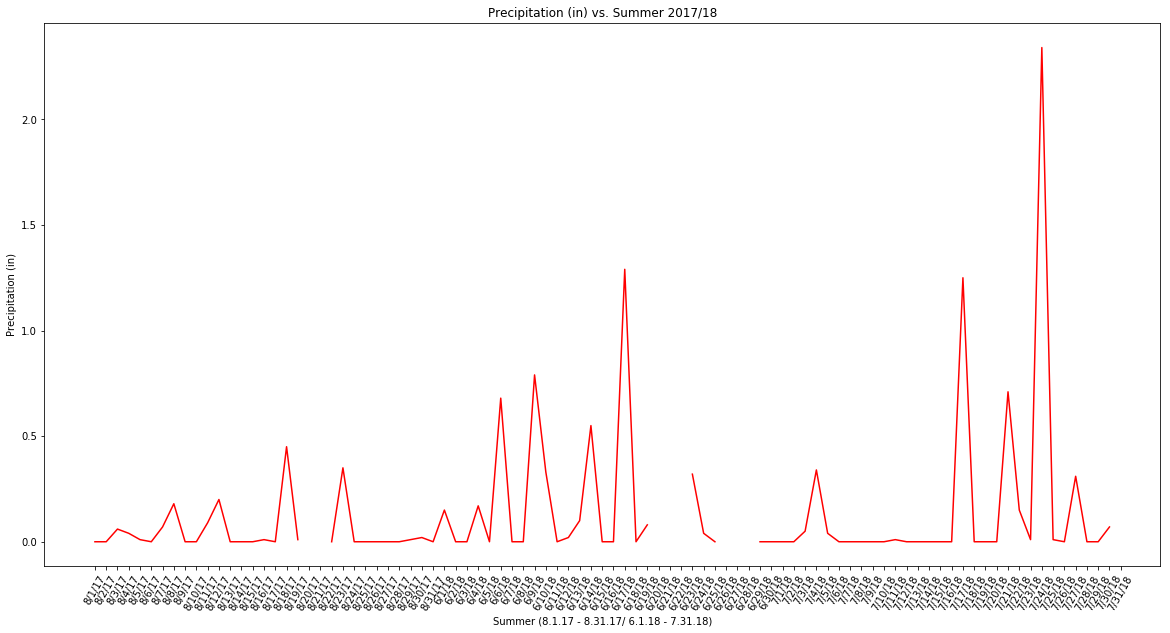

In [15]:
# Precipitation in Summer
Time = list(RC_NOAA_Summer['Date'])
Precip = list(RC_NOAA_Summer['Precip (in)'])
plt.figure(figsize = (20, 10))
plt.plot(Time, Precip, color = 'red')
plt.xlabel('Summer (8.1.17 - 8.31.17/ 6.1.18 - 7.31.18)')
plt.ylabel('Precipitation (in)')
plt.title('Precipitation (in) vs. Summer 2017/18')
axis = plt.xticks(RC_NOAA_Summer['Date'], RC_NOAA_Summer['Date'], rotation = 60)
plt.show()

##### This line plot shows the amount of precipitation in inches in August 2017 and  from June 1st to July 31st 2018 (Summer). According to the line plot above, it appears that the amount of percipitation increases from June 6th to around June 18th 2018. Then from June 19th to July 15th 2018, the amount of percipitation declines and does not increase more than 0.25 inches. Then from July 15th to July 26th the precipitation increases until it reaches its peak around July 26th of around 2.5 inches. 

In [16]:
RC_NOAA_Summer17 = RC_NOAA_Summer[RC_NOAA_Summer['Date'].str.match("8")]
RC_NOAA_Summer18 = RC_NOAA_Summer[RC_NOAA_Summer['Date'].str.contains("/18")]
RC_NOAA_Summer18 = RC_NOAA_Summer18.drop([17])

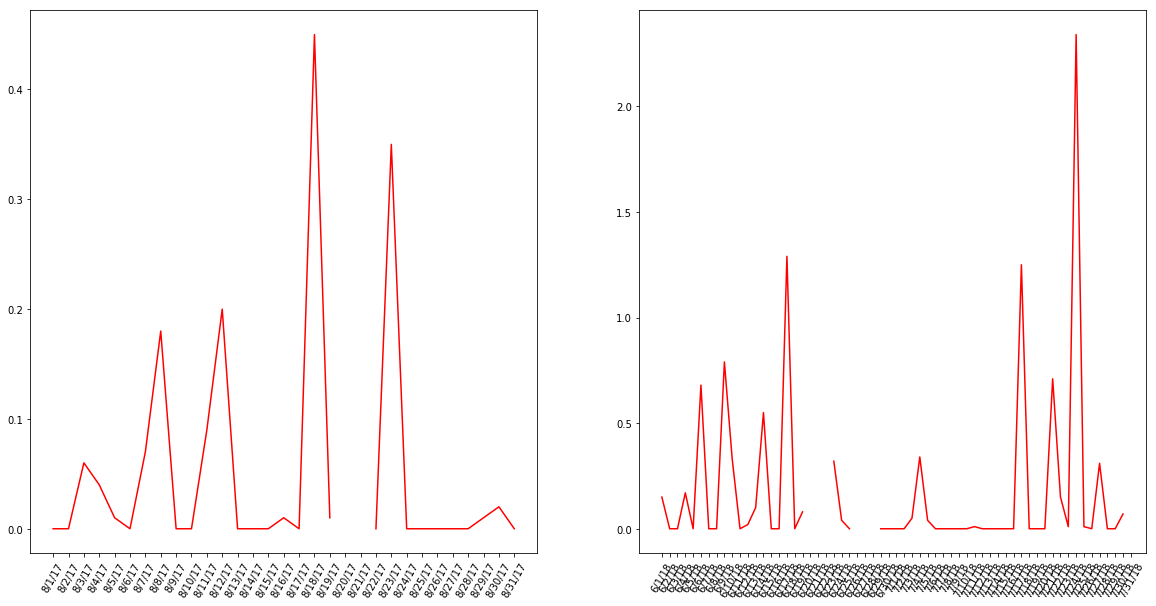

In [17]:
Time17 = list(RC_NOAA_Summer17['Date'])
Precip17 = list(RC_NOAA_Summer17['Precip (in)'])
Time18 = list(RC_NOAA_Summer18['Date'])
Precip18 = list(RC_NOAA_Summer18['Precip (in)'])

plt.figure(figsize = (20, 10))
plt.xlabel('Summer (8.1.17 - 8.31.17/ 6.1.18 - 7.31.18)')
plt.ylabel('Precipitation (in)')
plt.title('Precipitation (in) vs. Summer 2017/18')

plt.subplot(121)
plt.plot(Time17, Precip17, color = 'red')
axis17 = plt.xticks(RC_NOAA_Summer17['Date'], RC_NOAA_Summer17['Date'], rotation = 60)

plt.subplot(122)
plt.plot(Time18, Precip18, color = 'red')
axis18 = plt.xticks(RC_NOAA_Summer18['Date'], RC_NOAA_Summer18['Date'], rotation = 60)

plt.show()

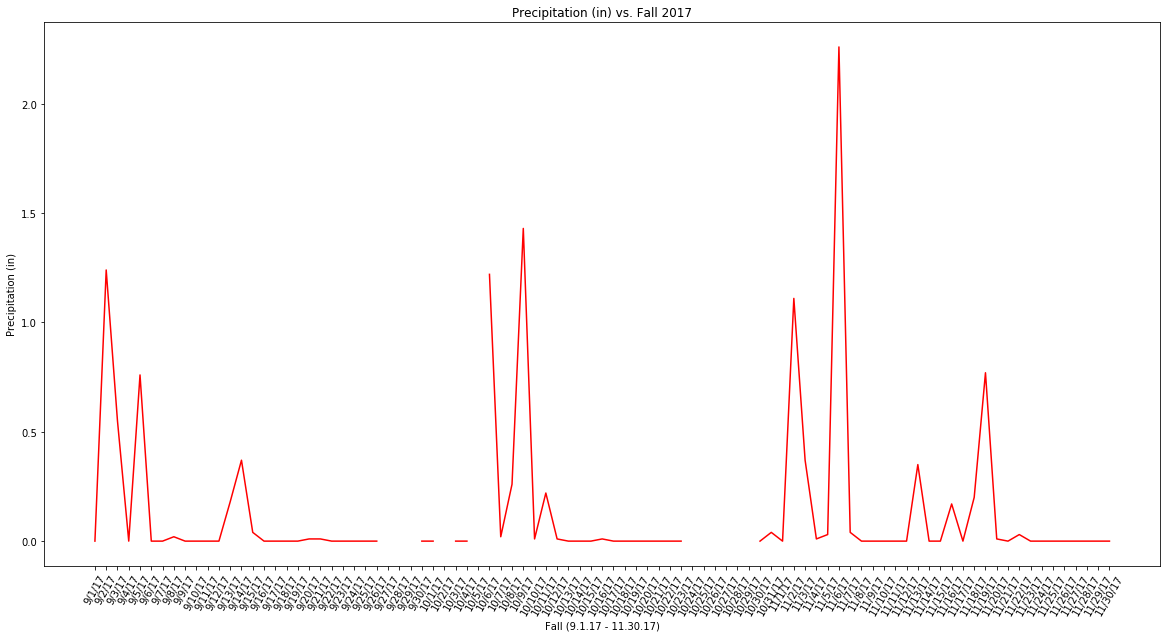

In [18]:
# Precipitation in Fall
Time = list(RC_NOAA_Fall['Date'])
Precip = list(RC_NOAA_Fall['Precip (in)'])
plt.figure(figsize = (20, 10))
plt.plot(Time, Precip, color = 'red')
plt.xlabel('Fall (9.1.17 - 11.30.17)')
plt.ylabel('Precipitation (in)')
plt.title('Precipitation (in) vs. Fall 2017')
axis = plt.xticks(RC_NOAA_Fall['Date'], RC_NOAA_Fall['Date'], rotation = 60)
plt.show()

##### This line plot shows the amount of precipitation in inches from September 1st to November 31st 2017 (Fall). According to the line plot above, it appears that it rains more at the beginning of each month in September, October, and November. Due to this, there appear to be periods of little rain after the first week and until the last week of a month. For example, in September and October, the amount of rain decreases after the first two weeks of the month. 

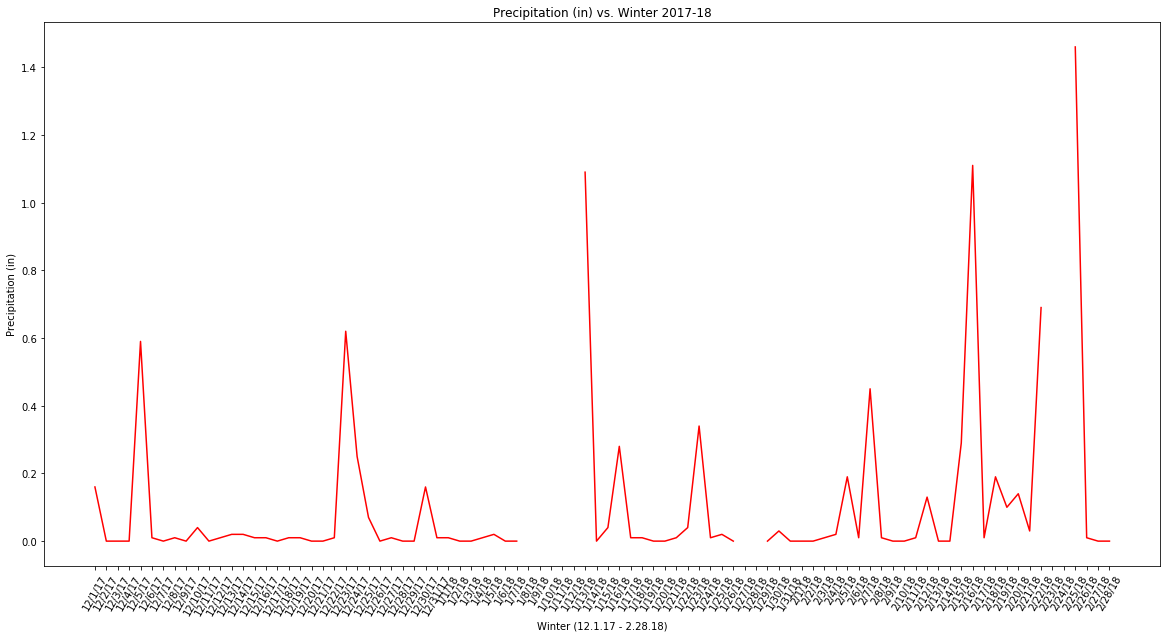

In [19]:
# Precipitation in Winter
Time = list(RC_NOAA_Winter['Date'])
Precip = list(RC_NOAA_Winter['Precip (in)'])
plt.figure(figsize = (20, 10))
plt.plot(Time, Precip, color = 'red')
plt.xlabel('Winter (12.1.17 - 2.28.18)')
plt.ylabel('Precipitation (in)')
plt.title('Precipitation (in) vs. Winter 2017-18')
axis = plt.xticks(RC_NOAA_Winter['Date'], RC_NOAA_Winter['Date'], rotation = 60)
plt.show()

###### This line plot shows the amount of precipitation in inches from December 1st 2017 to February 28th 2018 (Winter). According to the line plot above, it appears that it does not appear to rain a lot during the month of December 2017 as precipitation does not exceed 0.6 inches. However in January 2018, the amount of precipitation starts around January 10th at 1 inches, but then decreases and never exceeds around 0.4 inches between January 15th to February 13th 2018. The precipitation then picks up from February 15th to around February 25th when it reaches a maximum above 1.4 inches.

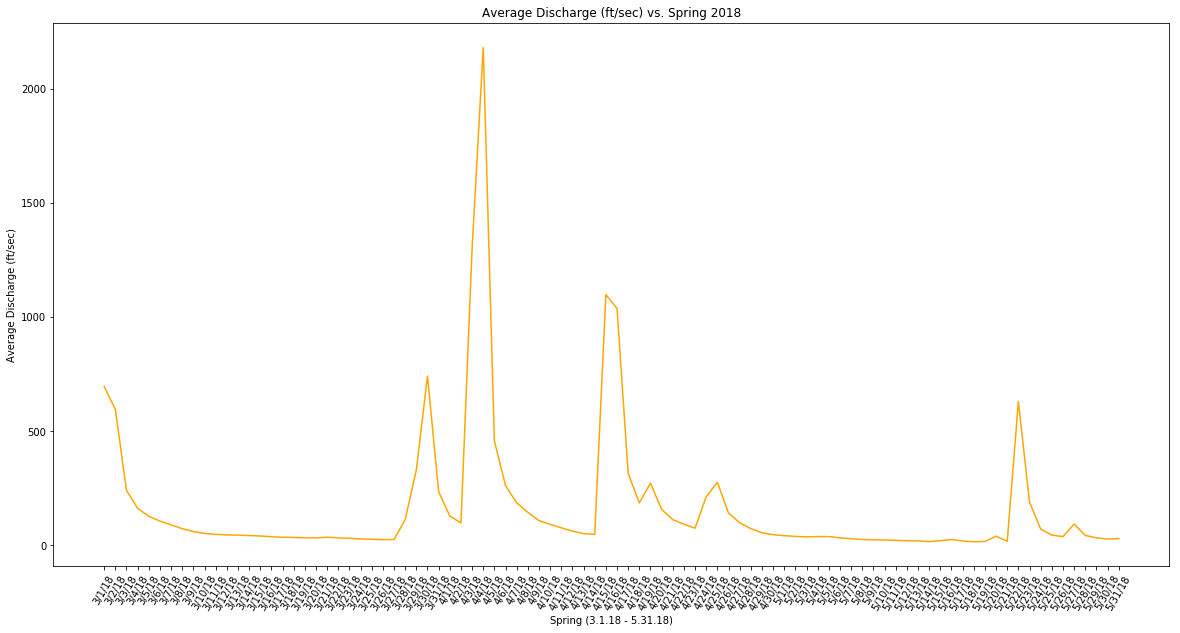

In [20]:
# Average Discharge in Spring
Time = list(RC_NOAA_Spring['Date'])
DC = list(RC_NOAA_Spring['dC(ft/sec)'])
plt.figure(figsize = (20, 10))
plt.plot(Time, DC, color = 'orange')
plt.xlabel('Spring (3.1.18 - 5.31.18)')
plt.ylabel('Average Discharge (ft/sec)')
plt.title('Average Discharge (ft/sec) vs. Spring 2018')
axis = plt.xticks(RC_NOAA_Spring['Date'], RC_NOAA_Spring['Date'], rotation = 60)
plt.show()

##### This line plot shows the Average Discharge in feet per second from March 3rd to May 31st 2018 (Spring). According to the line plot above, it appears that the Average Discharge is below 500 feet from the beginning of March to the end of March and the end of April to halfway of May. It is interesting to note that the Average Discharge increases from the end of March until the beginning of April 2018. During this period, the Average Discharge reaches its Spring maximum at above 2,000 feet per second. Then around April 15th, the Average Discharge increased once more to around 1000 feet per second.

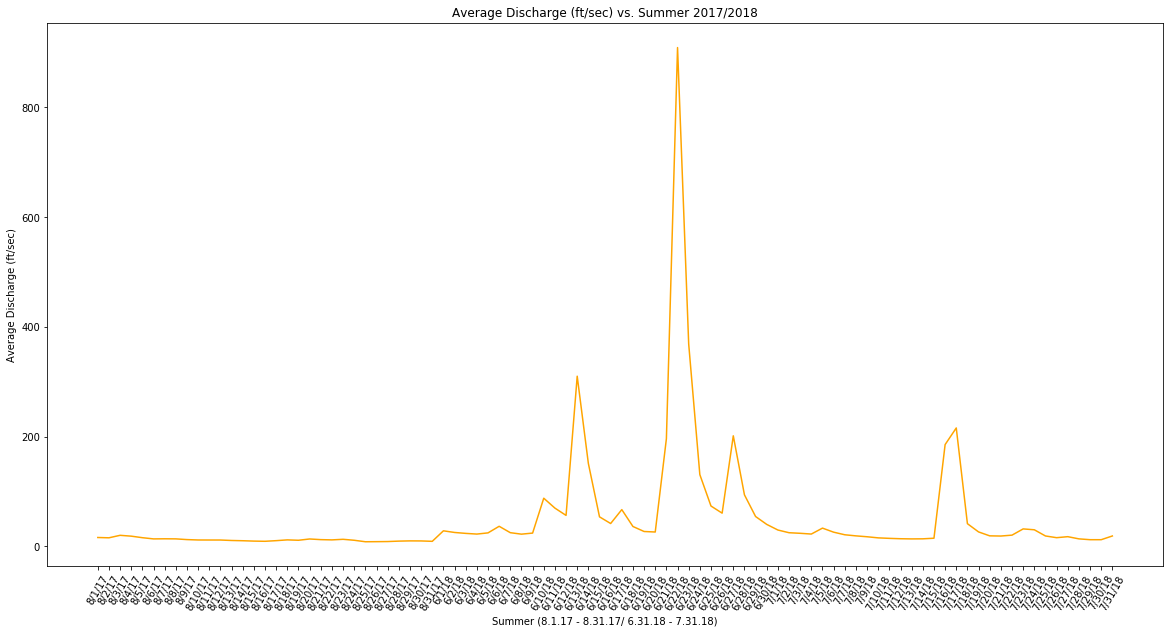

In [21]:
# Average Discharge in Summer
Time = list(RC_NOAA_Summer['Date'])
DC = list(RC_NOAA_Summer['dC(ft/sec)'])
plt.figure(figsize = (20, 10))
plt.plot(Time, DC, color = 'orange')
plt.xlabel('Summer (8.1.17 - 8.31.17/ 6.31.18 - 7.31.18)')
plt.ylabel('Average Discharge (ft/sec)')
plt.title('Average Discharge (ft/sec) vs. Summer 2017/2018')
axis = plt.xticks(RC_NOAA_Summer['Date'], RC_NOAA_Summer['Date'], rotation = 60)
plt.show()

##### This line plot shows the Average Discharge of Raccoon Creek in feet per second from August 1st - August 31st 2018 and from June 1st to July 31st 2018.  According to the line plot above, it appears that the Average Discharge for August is static at 0 feet per second. From June 6th to June 28th 2018, the Average Discharge increases. During this period the Average Discharge reaches its peak value at 900 feet per second. Then from July 1st to July 31st 2018 the Average Discharge remains relatively static except from July 15th to July 20th when the Average Discharge reaches around 200 feet per second. 

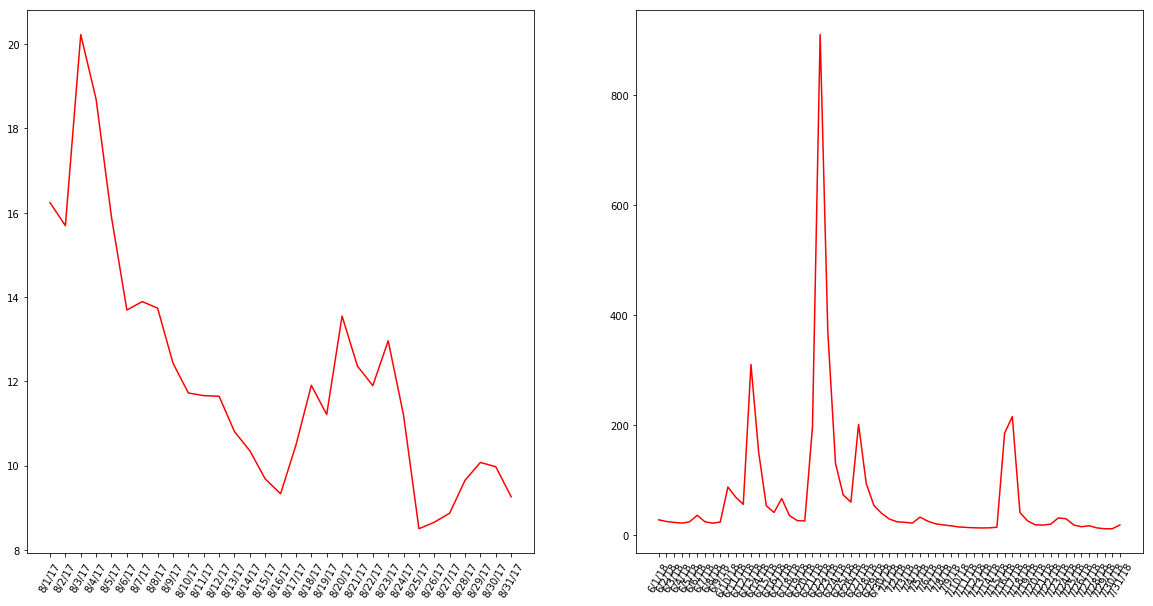

In [22]:
Time17 = list(RC_NOAA_Summer17['Date'])
Precip17 = list(RC_NOAA_Summer17['dC(ft/sec)'])
Time18 = list(RC_NOAA_Summer18['Date'])
Precip18 = list(RC_NOAA_Summer18['dC(ft/sec)'])

plt.figure(figsize = (20, 10))
plt.xlabel('Summer (8.1.17 - 8.31.17/ 6.1.18 - 7.31.18)')
plt.ylabel('Average Discharge (ft/sec)')
plt.title('Average Discharge (ft/sec) vs. Summer 2017/18')

plt.subplot(121)
plt.plot(Time17, Precip17, color = 'red')
axis17 = plt.xticks(RC_NOAA_Summer17['Date'], RC_NOAA_Summer17['Date'], rotation = 60)

plt.subplot(122)
plt.plot(Time18, Precip18, color = 'red')
axis18 = plt.xticks(RC_NOAA_Summer18['Date'], RC_NOAA_Summer18['Date'], rotation = 60)

plt.show()

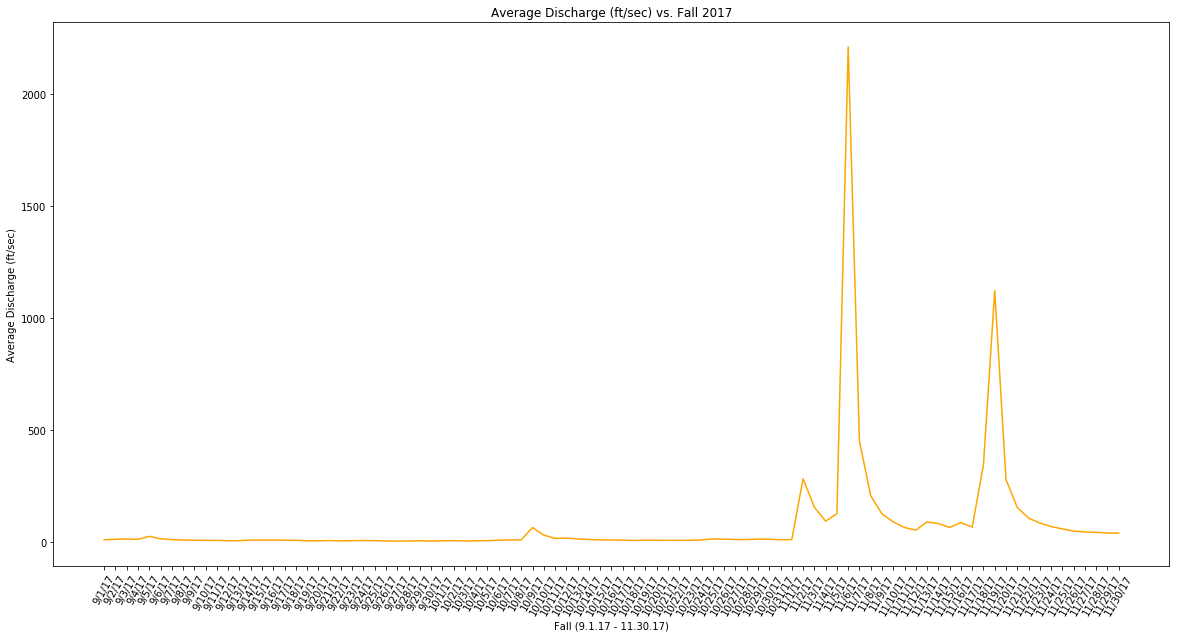

In [23]:
# Average Discharge in Fall
Time = list(RC_NOAA_Fall['Date'])
DC = list(RC_NOAA_Fall['dC(ft/sec)'])
plt.figure(figsize = (20, 10))
plt.plot(Time, DC, color = 'orange')
plt.xlabel('Fall (9.1.17 - 11.30.17)')
plt.ylabel('Average Discharge (ft/sec)')
plt.title('Average Discharge (ft/sec) vs. Fall 2017')
axis = plt.xticks(RC_NOAA_Fall['Date'], RC_NOAA_Fall['Date'], rotation = 60)
plt.show()

##### This line plot shows the Average Discharge of Raccoon Creek in feet per second from Fall 1st to November 30th 2018 (Fall). According to the line plot above, it appears that the Average Discharge from the September to the October is static at 0 feet per second. However, in early November around November 7th, the Average Discharge reaches its maximum around 2500 feet per second. The Average Discharge then decreases until around November 15th until the Average Discharge increases once more to around 1000 feet per second. 

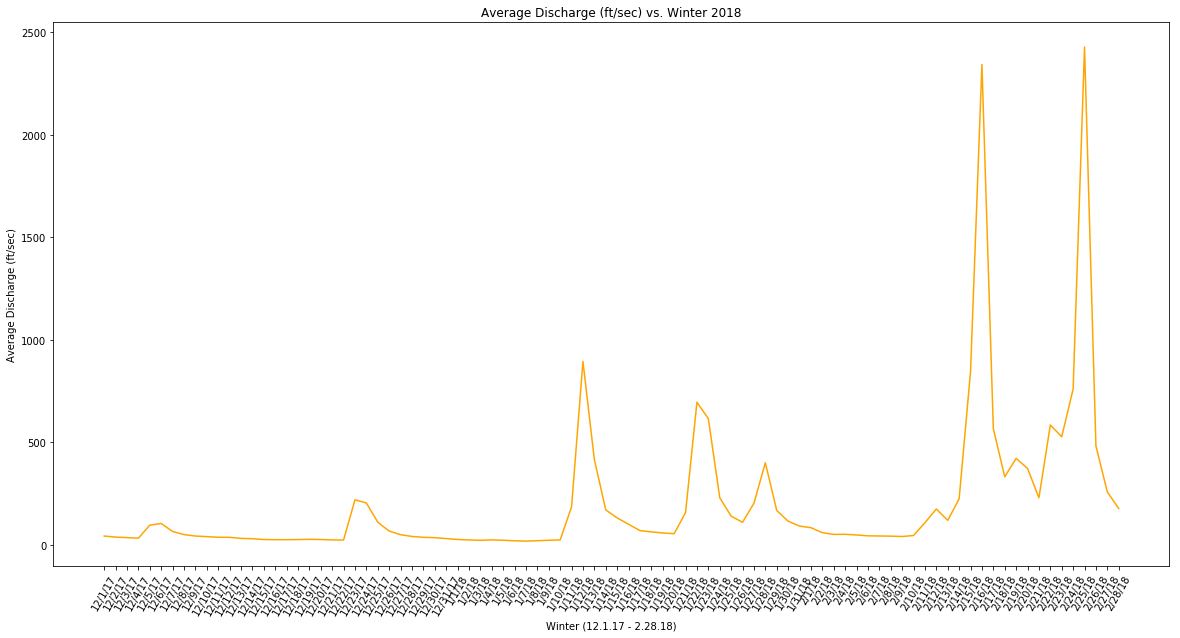

In [24]:
# Average Discharge in Winter
Time = list(RC_NOAA_Winter['Date'])
DC = list(RC_NOAA_Winter['dC(ft/sec)'])
plt.figure(figsize = (20, 10))
plt.plot(Time, DC, color = 'orange')
plt.xlabel('Winter (12.1.17 - 2.28.18)')
plt.ylabel('Average Discharge (ft/sec)')
plt.title('Average Discharge (ft/sec) vs. Winter 2018')
axis = plt.xticks(RC_NOAA_Winter['Date'], RC_NOAA_Winter['Date'], rotation = 60)
plt.show()

##### This line plot shows the Average Discharge in feet per second from December 1st 2017 to February 28th 2018 (Winter). According to the line plot above, it appears that the Average Discharge in Raccoon Creek is static from December 2017 until January 2018. Then from January 10th until the end of January the Average Discharge increases and fluctuates to between 500 and 1000 feet per second. From February 1st to 28th the Average Discharge reaches its peak twice around 2500 feet per second. 

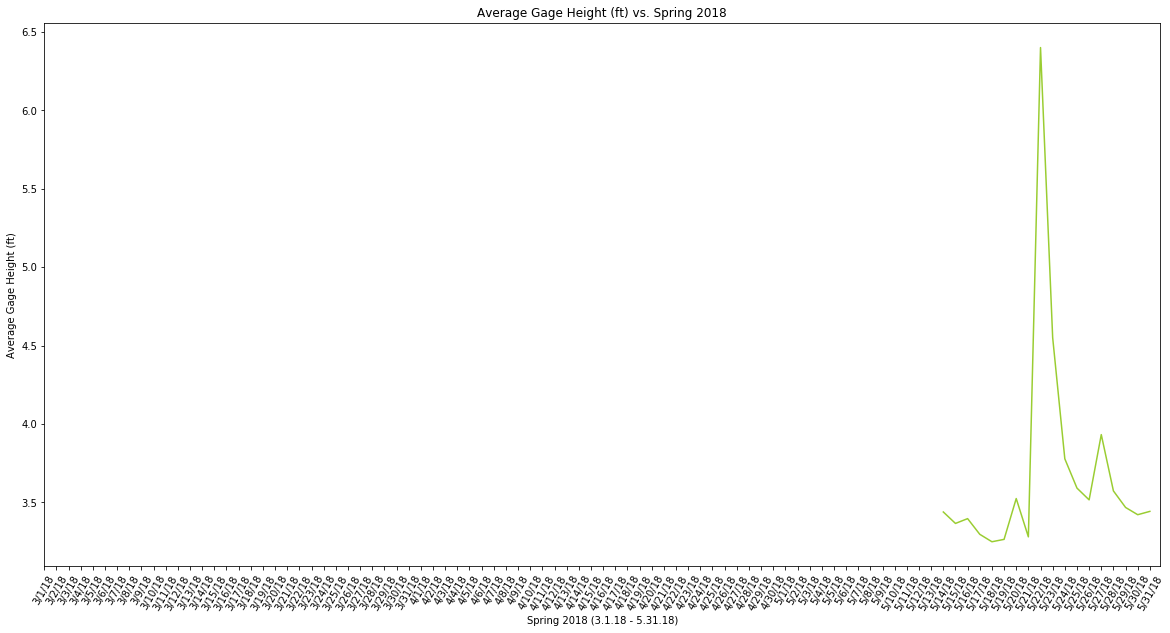

In [25]:
# Average Gage Height in Spring
Time = list(RC_NOAA_Spring['Date'])
GH = list(RC_NOAA_Spring['gH(ft)'])
plt.figure(figsize = (20, 10))
plt.plot(Time, GH, color = 'yellowgreen')
plt.xlabel('Spring 2018 (3.1.18 - 5.31.18)')
plt.ylabel('Average Gage Height (ft)')
plt.title('Average Gage Height (ft) vs. Spring 2018')
axis = plt.xticks(RC_NOAA_Spring['Date'], RC_NOAA_Spring['Date'], rotation = 60)
plt.show()

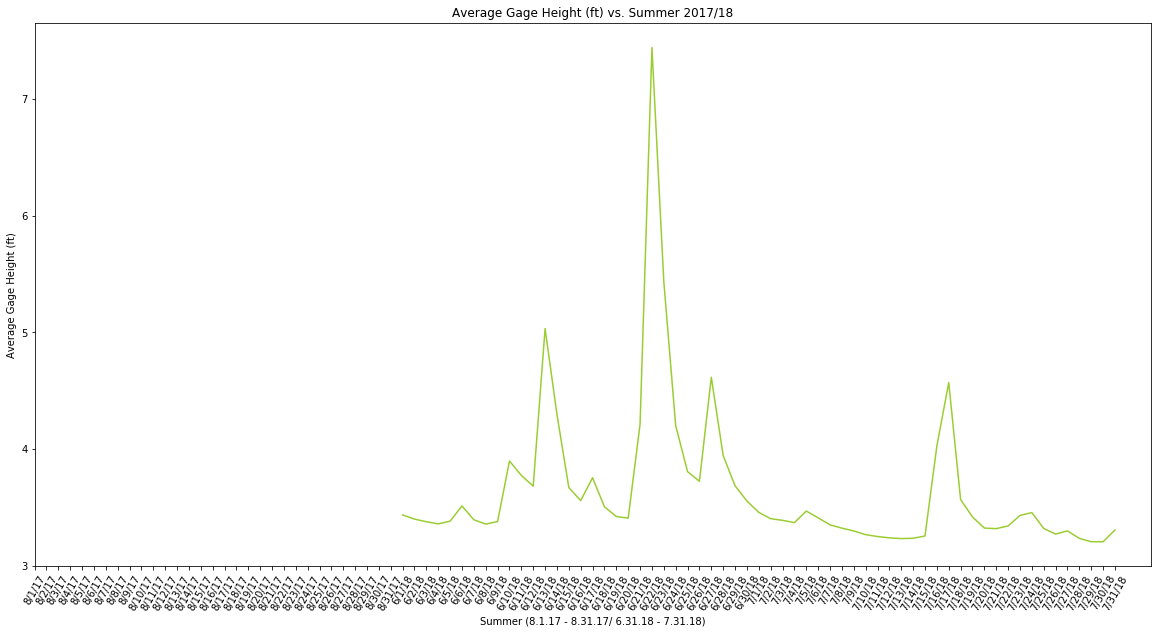

In [26]:
# Average Gage Height in Summer
Time = list(RC_NOAA_Summer['Date'])
GH = list(RC_NOAA_Summer['gH(ft)'])
plt.figure(figsize = (20, 10))
plt.plot(Time, GH, color = 'yellowgreen')
plt.xlabel('Summer (8.1.17 - 8.31.17/ 6.31.18 - 7.31.18)')
plt.ylabel('Average Gage Height (ft)')
plt.title('Average Gage Height (ft) vs. Summer 2017/18')
axis = plt.xticks(RC_NOAA_Summer['Date'], RC_NOAA_Summer['Date'], rotation = 60)
plt.show()

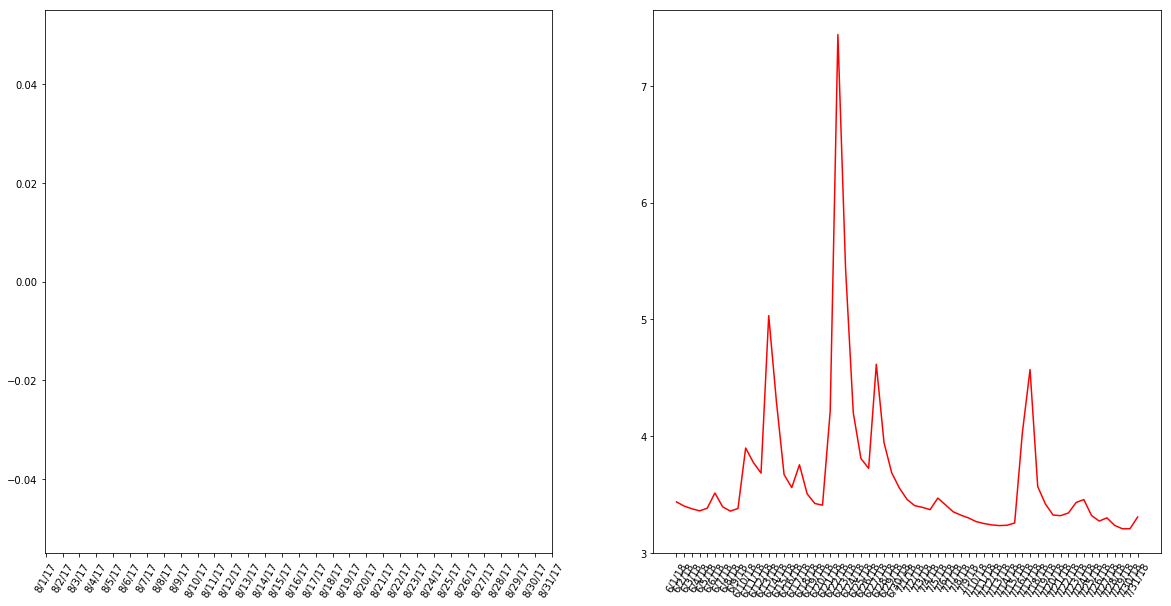

In [27]:
Time17 = list(RC_NOAA_Summer17['Date'])
Precip17 = list(RC_NOAA_Summer17['gH(ft)'])
Time18 = list(RC_NOAA_Summer18['Date'])
Precip18 = list(RC_NOAA_Summer18['gH(ft)'])

plt.figure(figsize = (20, 10))
plt.xlabel('Summer (8.1.17 - 8.31.17/ 6.1.18 - 7.31.18)')
plt.ylabel('Average Gage Height (ft)')
plt.title('Average Gage Height (ft) vs. Summer 2017/18')

plt.subplot(121)
plt.plot(Time17, Precip17, color = 'red')
axis17 = plt.xticks(RC_NOAA_Summer17['Date'], RC_NOAA_Summer17['Date'], rotation = 60)

plt.subplot(122)
plt.plot(Time18, Precip18, color = 'red')
axis18 = plt.xticks(RC_NOAA_Summer18['Date'], RC_NOAA_Summer18['Date'], rotation = 60)

plt.show()

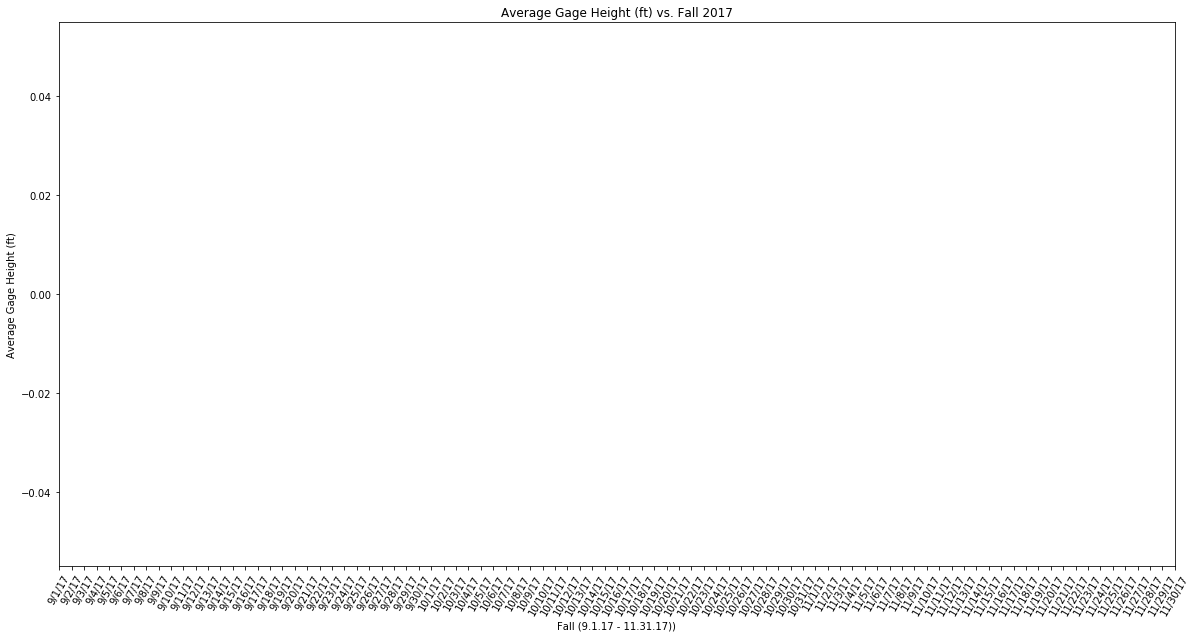

In [28]:
# Average Gage Height in Fall
Time = list(RC_NOAA_Fall['Date'])
GH = list(RC_NOAA_Fall['gH(ft)'])
plt.figure(figsize = (20, 10))
plt.plot(Time, GH, color = 'yellowgreen')
plt.xlabel('Fall (9.1.17 - 11.31.17))')
plt.ylabel('Average Gage Height (ft)')
plt.title('Average Gage Height (ft) vs. Fall 2017')
axis = plt.xticks(RC_NOAA_Fall['Date'], RC_NOAA_Fall['Date'], rotation = 60)
plt.show()

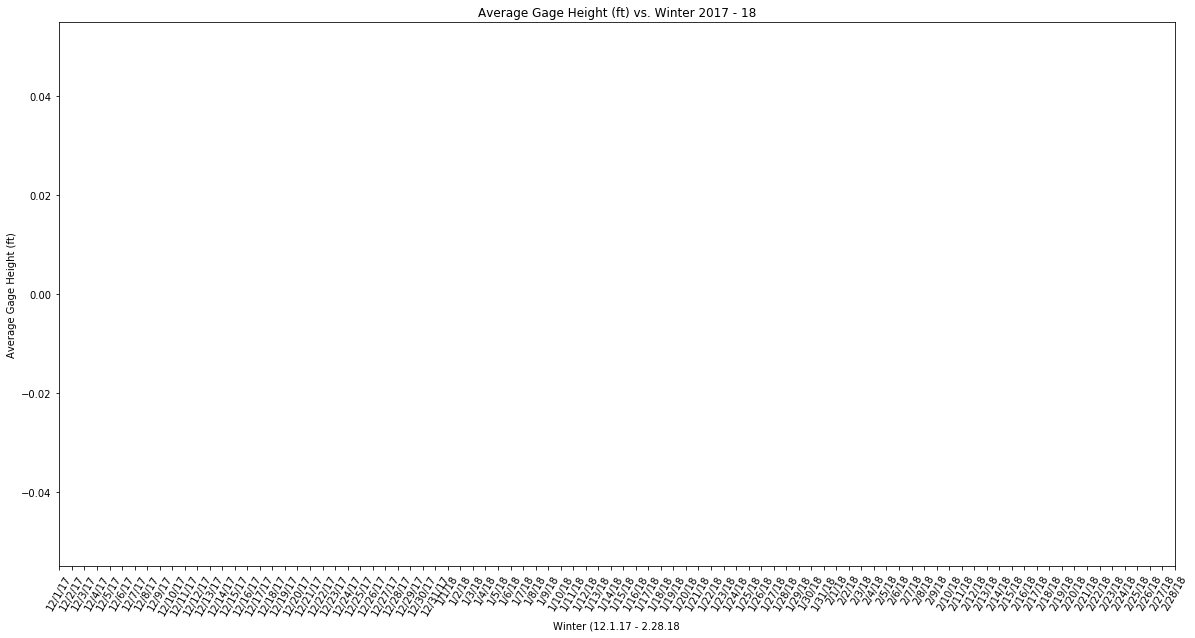

In [29]:
# Average Gage Height in Winter
Time = list(RC_NOAA_Winter['Date'])
GH = list(RC_NOAA_Winter['gH(ft)'])
plt.figure(figsize = (20, 10))
plt.plot(Time, GH, color = 'yellowgreen')
plt.xlabel('Winter (12.1.17 - 2.28.18')
plt.ylabel('Average Gage Height (ft)')
plt.title('Average Gage Height (ft) vs. Winter 2017 - 18')
axis = plt.xticks(RC_NOAA_Winter['Date'], RC_NOAA_Winter['Date'], rotation = 60)
plt.show()

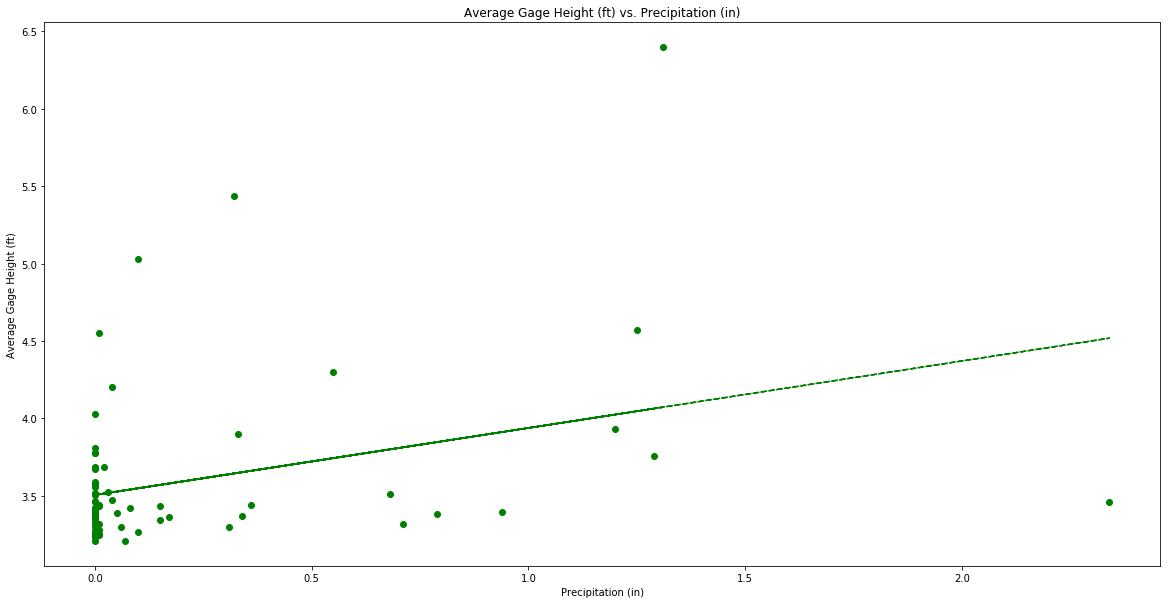

In [30]:
import numpy as np
RC_NOAA_merge = RC_NOAA_merge.dropna()
x = RC_NOAA_merge['Precip (in)']
y = RC_NOAA_merge['gH(ft)']
fit = np.polyfit(x,y,1)
fit_fn = np.poly1d(fit)
plt.figure(figsize = (20, 10))
plt.xlabel('Precipitation (in)')
plt.ylabel('Average Gage Height (ft)')
plt.title('Average Gage Height (ft) vs. Precipitation (in)')
plt.plot(x, y,'yo', x, fit_fn(x), '--k', color = 'green')
plt.show()

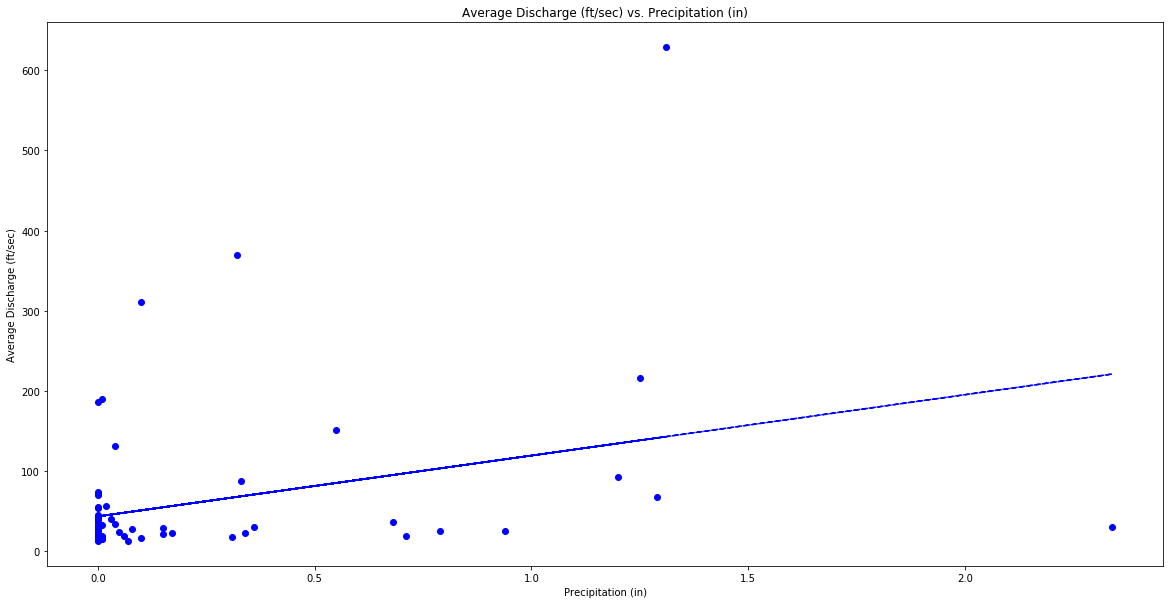

In [31]:
plt.figure(figsize=(20,10))
plt.xlabel('Precipitation (in)')
plt.ylabel('Average Discharge (ft/sec)')
x = list(RC_NOAA_merge['Precip (in)'])
y = list(RC_NOAA_merge['dC(ft/sec)'])
fit = np.polyfit(x,y,1)
fit_fn = np.poly1d(fit)
plt.title('Average Discharge (ft/sec) vs. Precipitation (in)')
plt.plot(x, y, 'yo', x, fit_fn(x), '--k', color = 'blue')
plt.show()

# Background Research:
### 1) - Where is Raccoon Creek? 

-----> Raccoon Creek is the Granville, OH 

### 2) - What is Raccoon Creek watershed?

-----> 

### 3) - What is the nature of the creek (size, length, depth, etc.)

### 4) - Where are the sensors that record the data 

### 5) - Who own and maintains these sensors 

### 6) - Where is the data publicly available?

### 7) - What are the measurements that are being provided in the data story? 

### 8) - How can you explain or relate these measurements to non-technical (non geoscience) people?

### 9) - How will you set the background in your notebook story? 

### 10) - What grpahics might  you include in your story?

# Writing Quality:
### 1) - What is your thesis? (won't know until complete investigation)

### 2) - What single compelling discovery drives the data story?

### 3) - How will you communicate your thesis in the notebook format?

### 4) - Who is your audience?

### 5) - Who will read this?

### 6) - What diversity can you expect in their backgrounds and levels of expertise? (These ppl will not know anything about the assignment)

### 7) - What structure will you use to tell your data story using the notebook format to present this story?

### 8) - Style - transition smoothly

### 9) - Writing center 